In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

In [2]:
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D  # noqa
from matplotlib.colors import hsv_to_rgb

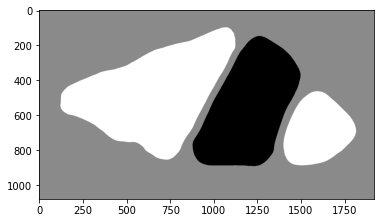

In [2]:
img_name = "RPf_00102_segmented.png"
img = cv2.imread(img_name,cv2.IMREAD_GRAYSCALE)
ax = plt.subplot()
ax.imshow(img,cmap="gray")

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([ 36. ,  44.7,  53.4,  62.1,  70.8,  79.5,  88.2,  96.9, 105.6,
        114.3, 123. ]),
 <a list of 1920 BarContainer objects>)

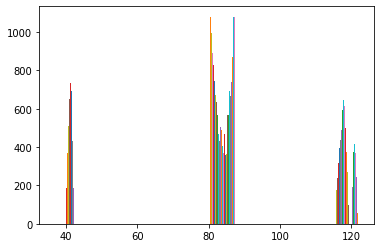

In [22]:
plt.hist(img)

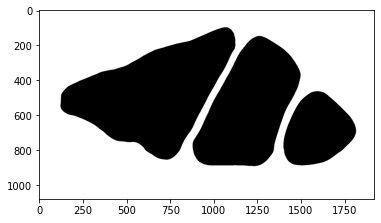

In [30]:
middle_seg = img&((img > 80) & (img < 90))
plt.imshow(middle_seg,cmap="gray")

In [18]:
edge_map = cv2.Canny(img,threshold1=3,threshold2=3*3) 
edge_map = 1/(1+np.abs(edge_map))

C:\Users\yaniv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


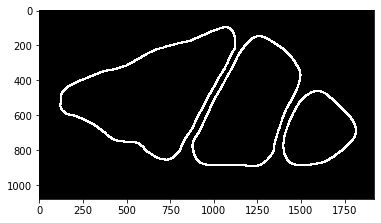

In [19]:
plt.imshow(edge_map,cmap="gray")

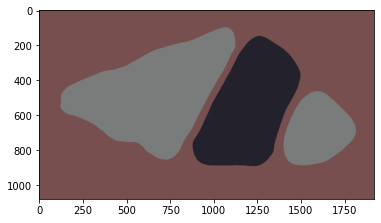

In [2]:
img_name = "RPf_00102_segmented.png"
img = cv2.imread(img_name,cv2.COLOR_BGR2RGB)
ax = plt.subplot()
ax.imshow(img)

In [6]:
#from region_growing import regionGrow

In [7]:
#region_grow_algo  = regionGrow(img_name,0.2)
#region_grow_algo.ApplyRegionGrow()

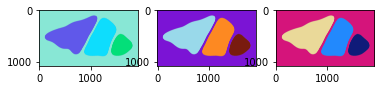

In [4]:
img_name = "vika orange.png" #"C:\\Users\\yaniv\\Desktop\\MSCBenGurion\\Courses\\Vision - Ohad Ben Shahar\\borders_detection\\Vika.png"
img_bgr = cv2.imread(img_name)

fig,ax = plt.subplots(1,3)

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
ax[0].imshow(img_hsv)
ax[1].imshow(img_rgb)
ax[2].imshow(img_bgr)
plt.show()

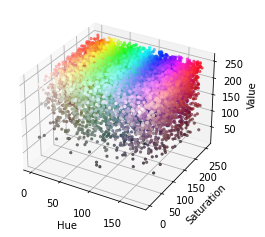

In [5]:
h, s, v = cv2.split(img_hsv)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = img_rgb.reshape((np.shape(img_rgb)[0]*np.shape(img_rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(
    h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker="."
)
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

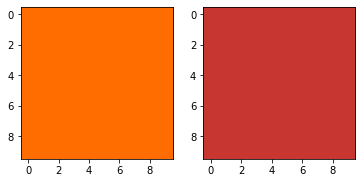

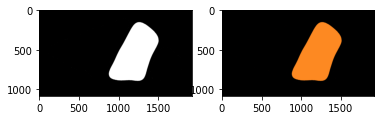

In [7]:
light_c = (1, 190, 200) #(60, 255, 255) #(60, 12, 100) #(18, 255, 255)#
dark_c = (18, 255, 255) #(120, 100,40) #(55.2518, 100.0000, 54.5098)#(1, 190, 200) #
lc_square = np.full((10, 10, 3), light_c, dtype=np.uint8) / 255.0
dc_square = np.full((10,10,3),dark_c,dtype=np.uint8)/255.0



plt.subplot(1, 2, 1)
plt.imshow(colors.hsv_to_rgb(dc_square))
plt.subplot(1, 2, 2)
plt.imshow(colors.hsv_to_rgb(lc_square))
plt.show()
mask = cv2.inRange(img_hsv,light_c,dark_c)
segment_yellow_img = cv2.bitwise_and(img_rgb,img_rgb,mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask,cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(segment_yellow_img)
plt.show()

#colors.hsv_to_rgb(lc_square)

In [8]:
# light_c = (100, 12, 60) #(60, 255, 255) #(60, 12, 100) #(18, 255, 255)#
# dark_c = (240,100,100) #(120, 100,40) #(55.2518, 100.0000, 54.5098)#(1, 190, 200) #
# lc_square = np.full((10, 10, 3), light_c, dtype=np.uint8)/ 255.0
# dc_square = np.full((10,10,3),dark_c,dtype=np.uint8)/255.0



# plt.subplot(1, 2, 1)
# plt.imshow(colors.hsv_to_rgb(dc_square))
# plt.subplot(1, 2, 2)
# plt.imshow(colors.hsv_to_rgb(lc_square))
# plt.show()
# # mask = cv2.inRange(img_hsv,light_c,dark_c)
# # segment_yellow_img = cv2.bitwise_and(img_rgb,img_rgb,mask=mask)
# # plt.subplot(1, 2, 1)
# # plt.imshow(mask,cmap="gray")
# # plt.subplot(1, 2, 2)
# # plt.imshow(segment_yellow_img)
# # plt.show()

# #colors.hsv_to_rgb(dc_square)

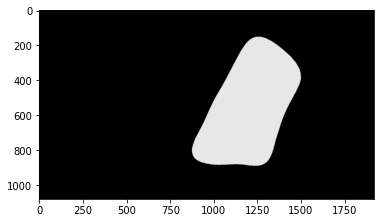

In [9]:
img_gray = cv2.cvtColor(segment_yellow_img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray,cmap="gray")

C:\Users\yaniv\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


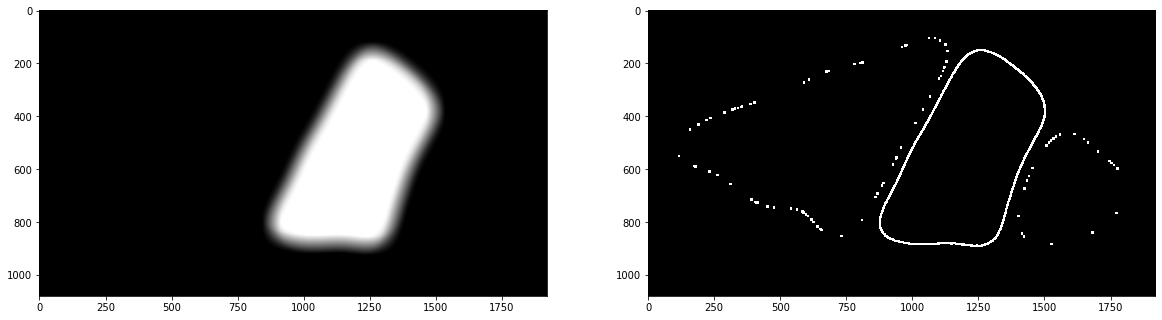

In [29]:
'''If think you do not need to add another filter. work it through the segmentation part '''
size_mean_ker = 70
mean_kernel = np.ones((size_mean_ker,size_mean_ker),np.float32)/(size_mean_ker**2)
mean_img = cv2.filter2D(img_gray,cv2.CV_64F,mean_kernel)

edge_map = cv2.Canny(img_gray,70,210)
edge_map_vis = 1/(1+abs(edge_map))

fig,axes = plt.subplots(1,2,figsize=(20,20))

for ax,im,title in zip(axes.flatten(),[mean_img,edge_map_vis],["filtered img","edgemap"]):
    ax.imshow(im,cmap="gray")


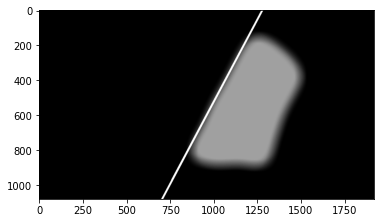

In [44]:
lines_map = cv2.HoughLines(edge_map,1,np.pi/180,150)
point_distance = 500
for r,theta in lines_map[0]:
    a,b = np.cos(theta), np.sin(theta)
    x0,y0 = a*r, b*r
    x1,y1 = int(x0 + point_distance * (-b)), int(y0 + point_distance*a)
    x2,y2 = int(x0 - point_distance * (-b)), int(y0 - point_distance*a)
    cv2.line(mean_img,(x1,y1),(x2,y2),(255,0,0),10)
plt.imshow(mean_img,cmap="gray")

In [51]:
lines_map[0]

array([[1.130000e+03, 4.886922e-01]], dtype=float32)

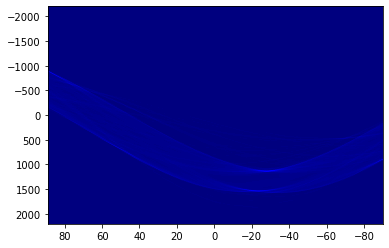

In [49]:
import imageio
import math

def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)


def hough_line(img, angle_step=1, lines_are_white=True, value_threshold=5):
    """
    Hough transform for lines
    Input:
    img - 2D binary image with nonzeros representing edges
    angle_step - Spacing between angles to use every n-th angle
                 between -90 and 90 degrees. Default step is 1.
    lines_are_white - boolean indicating whether lines to be detected are white
    value_threshold - Pixel values above or below the value_threshold are edges
    Returns:
    accumulator - 2D array of the hough transform accumulator
    theta - array of angles used in computation, in radians.
    rhos - array of rho values. Max size is 2 times the diagonal
           distance of the input image.
    """
    # Rho and Theta ranges
    thetas = np.deg2rad(np.arange(-90.0, 90.0, angle_step))
    width, height = img.shape
    diag_len = int(round(math.sqrt(width * width + height * height)))
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)

    # Cache some resuable values
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    num_thetas = len(thetas)

    # Hough accumulator array of theta vs rho
    accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint8)
    # (row, col) indexes to edges
    are_edges = img > value_threshold if lines_are_white else img < value_threshold
    y_idxs, x_idxs = np.nonzero(are_edges)

    # Vote in the hough accumulator
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]

        for t_idx in range(num_thetas):
            # Calculate rho. diag_len is added for a positive index
            rho = diag_len + int(round(x * cos_t[t_idx] + y * sin_t[t_idx]))
            accumulator[rho, t_idx] += 1

    return accumulator, thetas, rhos


def show_hough_line(img, accumulator, thetas, rhos, save_path=None):
    plt.imshow(accumulator, aspect='auto',cmap='jet', extent=[np.rad2deg(thetas[-1]), np.rad2deg(thetas[0]), rhos[-1], rhos[0]])
    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()



# imgpath = 'RPf_00102_segmented.png'
# img = imageio.imread(imgpath)
# if img.ndim == 3:
#     img = rgb2gray(img)
img = edge_map_vis
accumulator, thetas, rhos = hough_line(img)
show_hough_line(img,
                accumulator,
                thetas, rhos,
                save_path=None)